In [1]:
import numpy as np
from matplotlib import pyplot as plt
!pip install Pillow

In [2]:
def normalize(X):
    '''
      Normalise data before processing
      Return normalized data and normalization parameters
    '''
    num = X.shape[1]
    norm_params = np.zeros((2, num))
    norm_params[0] = X.mean(axis = 0)
    norm_params[1] = X.std(axis = 0, ddof = 1)
    norm_X = (X - norm_params[0]) / norm_params[1]
    return norm_X, norm_params

In [3]:
def transform(X,n_components):
    '''
        Select components with largest variance:
            1) Estimate covariance matrix
            2) Find its eigenvalues and eigenvectors
            3) Check if eigenvalues are complex -> to real space
            4) Sort vals & vectors
            5) Select n components
            5) Project all data on the selected components  
    '''
    cov = np.dot(X.T, X) / len(X)
    
    e_val, e_vect = np.linalg.eig(cov)
    
    e_val = np.absolute(e_val)
    
    ind = np.argsort(-e_val)
    e_vect = e_vect[:, ind]
    e_vect = e_vect.astype(float)
    
    e_vect_reduced = e_vect[:, :n_components]
    new_X = np.dot(X, e_vect_reduced)
    return new_X, e_vect_reduced

In [8]:
def restore(X_reduced, evect_reduced, norm_params):
    '''
        Restore "original" values:
            1) Restore original size
            2) Rescale
    '''
    X_rest = np.dot(X_reduced, evect_reduced.T)
    X_rest = (X_rest * norm_params[1] + norm_params[0])
    return X_rest

## All processing

### Simple data

In [9]:
points = 10
X = np.zeros((points,2))
x = np.arange(1,points+1)
y = 4 * x *x + np.random.randn(points)*2
X[:,1] = y
X[:,0] = x
number_of_components = 1

In [10]:
# normalization
X_norm, norm_params = normalize(np.copy(X))

# dimension reduction
X_reduced, evect_reduced = transform(X_norm, number_of_components)

# restoring dimensions
restored_X = restore(X_reduced, evect_reduced, norm_params)

### Visualization

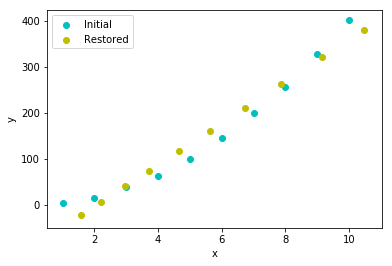

In [11]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], color='c', label='Initial')
plt.scatter(restored_X[:, 0], restored_X[:, 1], color='y', label='Restored')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Try use PCA on image

In [12]:
from PIL import Image
number_of_components_image = 100

# read image 
img = Image.open('pct.jpg')
# black & white transformation
img = img.convert('L')

# create numpy array
img_X = (np.copy(np.asarray(img))).astype(float)

# normalization
X_norm_img, norm_params = normalize(img_X)

# dimension reduction
X_reduced_img, evect_reduced = transform(X_norm_img, number_of_components_image)

# dimension restoring
X_restored_img = restore(X_reduced_img, evect_reduced, norm_params)

# create from restored array
restored_img = Image.fromarray(X_restored_img.astype(int))

img.show()
restored_img.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
